Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Github/PAC/cnn

/content/drive/MyDrive/Github/PAC/cnn


# Treinamento

In [3]:
import data
import aimodel
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.color import label2rgb

In [4]:
dataset = (x_train, y_train), (x_test, y_test) = data.load_dataset(as_tensor=True)

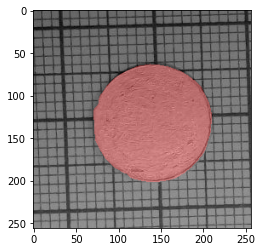

In [5]:
i = np.random.randint(len(x_train))
plt.imshow(label2rgb(y_train[i, :, :, 0], x_train[i, :, :, 0], bg_label=0))
plt.show()

In [10]:
unet = aimodel.build_unet((256, 256, 1), (16, 32, 64), name='unet')
unet.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
plot_callback = aimodel.UnetTrainingPlot(unet, dataset)

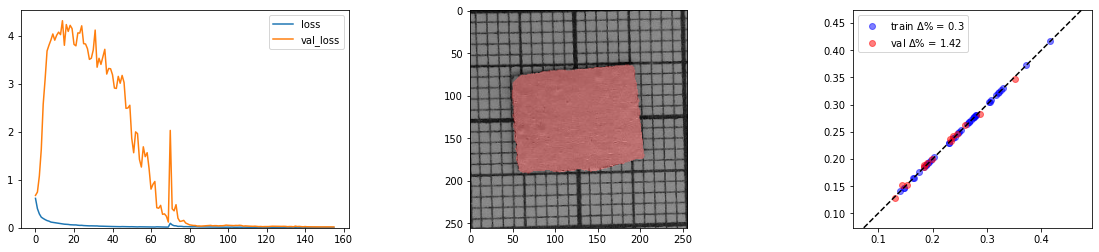

7/7 [==============================] - 31s 5s/step - loss: 0.0062 - val_loss: 0.0180
Epoch 149/150
7/7 [==============================] - 26s 4s/step - loss: 0.0062 - val_loss: 0.0187
Epoch 150/150
7/7 [==============================] - 26s 4s/step - loss: 0.0063 - val_loss: 0.0181


In [13]:
history = unet.fit(
    x=x_train,
    y=y_train,
    epochs=150,
    batch_size=len(x_train)//6,
    validation_data=(x_test, y_test),
    callbacks=[plot_callback]
)

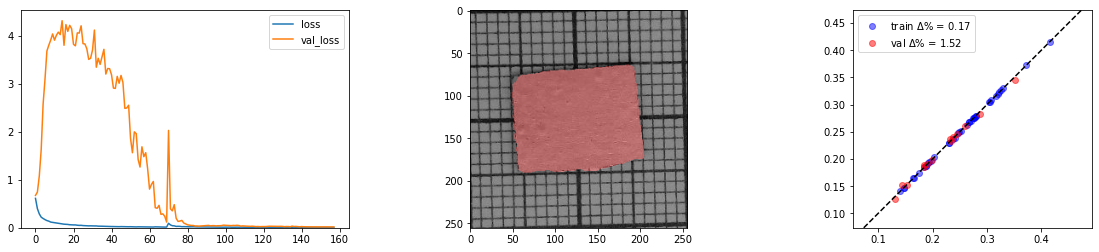

In [14]:
plot_callback.on_epoch_end(plot_callback.period)